In [1]:
import numpy as np
import pandas
from sklearn import datasets

In [2]:
## 연속형 데이터 --> regression 문제

diabetes = datasets.load_diabetes()

In [3]:
diabetes.data.shape, diabetes.target.shape

((442, 10), (442,))

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

- train, test 분리하기

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.25)

x_train.shape, x_test.shape

((331, 10), (111, 10))

- Linear Regression by stats_models

In [6]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sm_x_train = sm.add_constant(x_train, has_constant='add')
sm_model = sm.OLS(y_train, sm_x_train)
fitted_sm_model = sm_model.fit()
fitted_sm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     32.55
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           3.36e-43
Time:                        15:05:19   Log-Likelihood:                -1788.7
No. Observations:                 331   AIC:                             3599.
Df Residuals:                     320   BIC:                             3641.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.8711      3.016     51.019      0.000     147.937     159.805
x1            24.3058     71.393      0.340      0.734    -116.153     164.764
x2          -247.8652     72.156     -3.435      0.001    -389.826    -105.904
x3           469.7855     78.470      5.987      0.000     315.403     624.168
x4           321.6873     76.396      4.211      0.000     171.385     471.989
x5          -646.6446    493.861     -1.309      0.191   -1618.270     324.980
x6           351.7989    401.170      0.877      0.381    -437.464    1141.062
x7           -34.4630    247.716     -0.139      0.889    -521.821     452.894
x8           117.2309    189.373      0.619      0.536    -255.343     489.805
x9           640.2915    202.076      3.169      0.002     242.727    1037.856
x10          137.9859     79.022      1.746      0.082     -17.482     293.454
==============================================================================
Omnibus:                        0.793   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.860
Skew:                          -0.001   Prob(JB):                        0.651
Kurtosis:                       2.750   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
sm_x_test = sm.add_constant(x_test, has_constant="add")
sm_model_predict = fitted_sm_model.predict(sm_x_test)

mean_squared_error(sm_model_predict, y_test)

2861.22954623926

- LinearRegression 모델 학습

In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
reg.coef_

array([  24.30580715, -247.86524597,  469.78551394,  321.68732629,
       -646.64455764,  351.79890502,  -34.46301138,  117.23086924,
        640.29154492,  137.9858861 ])

- 성능 평가

In [9]:
reg.score(x_test, y_test)

0.5250306891271108

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg.predict(x_test))

# np.mean((reg.predict(x_test) - y_test)**2)

2861.2295462392526

- 그래프 그리기

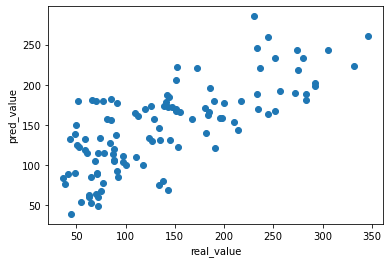

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test,reg.predict(x_test))
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

## 그래도 어느정도 상관관계가 형성됨

- 회귀 계수 축소
    - Lasso

In [13]:
from sklearn.linear_model import Lasso

In [14]:
lasso = Lasso(alpha=0.0005)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0005)

In [15]:
lasso.coef_

array([  23.96557732, -247.21055504,  470.0918811 ,  321.42116083,
       -621.50973131,  331.85786424,  -45.06413469,  114.17015112,
        631.05163453,  138.0257172 ])

In [16]:
lasso.score(x_test, y_test) ## R-square값

0.524859907412629

In [17]:
mean_squared_error(y_test, lasso.predict(x_test))

## 이 때 MSE가 조금 더 낮아졌다

2862.2583404713146

- ridge

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge = Ridge(alpha=0.05)
ridge.fit(x_train, y_train)

Ridge(alpha=0.05)

In [20]:
ridge.coef_

array([  24.34105527, -222.34152298,  455.07826484,  308.44990678,
       -121.87636168,  -67.10743713, -233.11641429,   90.37414889,
        417.68314564,  144.931366  ])

In [21]:
ridge.score(x_test, y_test)

0.5141117185404783

In [22]:
mean_squared_error(y_test, ridge.predict(x_test))

2927.0057564949734

- elasticnet

In [23]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.0005)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.0005)

In [24]:
elastic.coef_

array([  25.34714853, -208.88265005,  442.39018628,  300.98452747,
        -94.53996418,  -83.51348942, -232.32210839,   97.19373665,
        394.90600125,  146.69474465])

In [25]:
elastic.score(x_test, y_test)

0.5103514761796288

In [26]:
mean_squared_error(y_test, elastic.predict(x_test))

2949.657570617681

- PCA

In [27]:
from sklearn.decomposition import PCA

x = diabetes.data
y = diabetes.target

pca = PCA(n_components=4)
pca.fit(x)

PCA(n_components=4)

In [28]:
pca.components_

array([[ 0.21643101,  0.18696711,  0.3031625 ,  0.2717397 ,  0.34325493,
         0.35186062, -0.28243639,  0.42883325,  0.37861731,  0.32218282],
       [ 0.04437151, -0.38654811, -0.15628061, -0.13825564,  0.57302669,
         0.45593985,  0.50624287, -0.06818423, -0.0261893 , -0.0849466 ],
       [ 0.49466811, -0.10685833,  0.1675317 ,  0.51356804, -0.0685867 ,
        -0.26969438,  0.38602787, -0.38068121,  0.0636315 ,  0.27684271],
       [-0.4140095 , -0.67986052,  0.49982533, -0.01966734, -0.06839533,
        -0.16777384, -0.07602005,  0.0079212 ,  0.26442742,  0.08708624]])

In [29]:
pca.explained_variance_

## 진짜 성능 안좋음

array([0.0091252 , 0.00338394, 0.00273461, 0.00216661])

In [30]:
PCs = pca.transform(x)
PCs

array([[ 0.02793062, -0.09260116,  0.02802696, -0.00393895],
       [-0.13468605,  0.06526341,  0.00132778, -0.02235559],
       [ 0.01294474, -0.07776417,  0.0351635 , -0.03764663],
       ...,
       [-0.00976257, -0.05733724,  0.02359604, -0.06437226],
       [ 0.03295629,  0.00999424, -0.04132126,  0.07690284],
       [-0.09056089,  0.18910814, -0.00230125, -0.01049342]])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(PCs, y, test_size=0.25)

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
lr.coef_

array([ 430.65678896, -233.89960393,  272.02621191,  589.67542799])

In [34]:
lr.score(x_test, y_test)

0.4595824162156593

In [35]:
mean_squared_error(y_test, lr.predict(x_test))


3305.412986773166

- SVC

In [36]:
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.25)

reg = svm.LinearSVR()
reg.fit(x_train, y_train)

LinearSVR()

In [37]:
reg.coef_

array([ 2.19342006,  0.90799532,  5.82009667,  5.16728981,  3.12121813,
        3.24993756, -5.37470919,  5.63037892,  6.35463809,  4.65336977])

In [38]:
reg.score(x_test, y_test)

-0.5224867434351705

In [39]:
mean_squared_error(y_test, reg.predict(x_test))

8778.581703077807

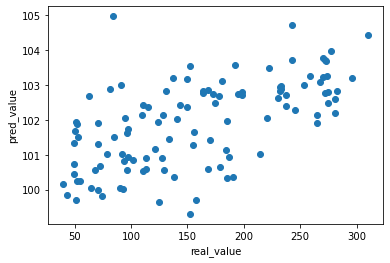

In [40]:
plt.scatter(y_test,reg.predict(x_test))
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

# 오히려 잘 안됨

In [41]:
from sklearn import tree
reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
reg.score(x_test, y_test)

-0.18337166169141228

In [43]:
mean_squared_error(y_test, reg.predict(x_test))

## 성능 제일 안좋음

6823.261261261261

- neural network

In [44]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(8,8,8,8), activation='relu', solver='adam')
reg.fit(x_train, y_train)

C:\Users\Jang\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=(8, 8, 8, 8))

In [45]:
reg.score(x_test, y_test)

-3.5389386828843667

In [46]:
mean_squared_error(y_test, reg.predict(x_test))

26171.291306653966

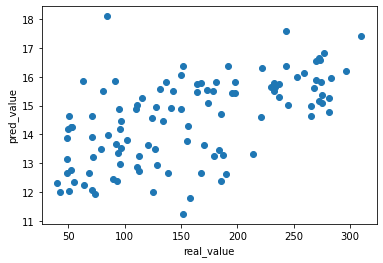

In [47]:
plt.scatter(y_test,reg.predict(x_test))
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

- bagging

In [48]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

bagging_model = BaggingRegressor(base_estimator= LinearRegression(),
                                 n_estimators = 10,
                                 verbose = 1)
fitted_bagging_model = bagging_model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [49]:
fitted_bagging_model.score(x_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.5424531046750624

In [50]:
mean_squared_error(y_test, fitted_bagging_model.predict(x_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


2638.192300142406

- bagging with for

In [51]:
bagging_predict_result = []
print("x_train 수: ", x_train.shape[0])

for _ in range(10):
    data_idx = [idx for idx in range(x_train.shape[0])]
    random_data_idx = np.random.choice(data_idx, x_train.shape[0])
    print('복원추출시 unique한 데이터 수:', len(set(random_data_idx)))
    x_train2 = x_train[random_data_idx]
    y_train2 = y_train[random_data_idx]
    
    reg = LinearRegression()
    reg.fit(x_train2, y_train2)
    
    pred = reg.predict(x_test)
    
    bagging_predict_result.append(pred)
    print('MSE:', mean_squared_error(y_test, pred), '\n')


x_train 수:  331
복원추출시 unique한 데이터 수: 206
MSE: 2901.7669361725916 

복원추출시 unique한 데이터 수: 200
MSE: 2668.9957256923835 

복원추출시 unique한 데이터 수: 201
MSE: 2732.922636913014 

복원추출시 unique한 데이터 수: 204
MSE: 2924.1533187128543 

복원추출시 unique한 데이터 수: 201
MSE: 2640.034216715466 

복원추출시 unique한 데이터 수: 215
MSE: 2607.701104458265 

복원추출시 unique한 데이터 수: 208
MSE: 2646.3793809831527 

복원추출시 unique한 데이터 수: 223
MSE: 2662.0744593949275 

복원추출시 unique한 데이터 수: 208
MSE: 2713.9539342349735 

복원추출시 unique한 데이터 수: 213
MSE: 2725.3883237136 



In [52]:
bagging_predict = []
for i in range(y_test.shape[0]):
    temp_predict = []
    for j in range(len(bagging_predict_result)):
        temp_predict.append(bagging_predict_result[j][i])
    bagging_predict.append(np.mean(temp_predict))

mean_squared_error(y_test, bagging_predict)

2632.5096492837615

- random forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=20, max_depth=5)
reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20)

In [54]:
reg.score(x_test, y_test)

0.5097355873176823

In [55]:
mean_squared_error(y_test, reg.predict(x_test))

2826.8398535494002

- Ada Boosting

In [56]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(n_estimators=20)
reg.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=20)

In [57]:
mean_squared_error(y_test, reg.predict(x_test))

3119.118248265967

In [58]:
reg.score(x_test, y_test)

0.459045168705702

- gradient boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(x_train, y_train)

GradientBoostingRegressor()

In [60]:
mean_squared_error(y_test, reg.predict(x_test))

2858.9409087797912

In [61]:
reg.score(x_test, y_test)

0.504168237979074

- XGBoost

In [62]:
import xgboost as xgb

xgb_dtrain = xgb.DMatrix(data = x_train, label = y_train)
xgb_dtest = xgb.DMatrix(data = x_test)

xgb_param = {'max_depth': 10,
             'learning_rate': 0.01,
             'n_estimators': 15}

xgb_model = xgb.train(params=xgb_param, dtrain=xgb_dtrain)


C:\Users\Jang\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Jang\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[15:05:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [63]:
mean_squared_error(y_test, xgb_model.predict(xgb_dtest))

25831.43710094354

- LightGbm

In [64]:
import lightgbm as lgb

lgb_dtrain = lgb.Dataset(data = x_train, label = y_train)

lgb_param = {'max_depth': 10,
             'learning_rate': 0.01,
             'n_estimators': 15}

lgb_model = lgb.train(params=lgb_param, train_set=lgb_dtrain)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 10
[LightGBM] [Info] Start training from score 150.226586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [65]:
mean_squared_error(y_test, lgb_model.predict(x_test))

5005.113881064382

- Ensemble in Ensemble (using light gbm)

In [70]:
bagging_predict_result = []
print("x_train 수: ", x_train.shape[0])

for _ in range(10):
    data_idx = [idx for idx in range(x_train.shape[0])]
    random_data_idx = np.random.choice(data_idx, x_train.shape[0])
    print('복원추출시 unique한 데이터 수:', len(set(random_data_idx)))
    
    x_train2 = x_train[random_data_idx]
    y_train2 = y_train[random_data_idx]
    
    lgb_dtrain = lgb.Dataset(data = x_train2, label = y_train2)
    lgb_param = {'max_depth': 10,
                 'learning_rate': 0.01,
                 'n_estimators': 15}
    lgb_model = lgb.train(params=lgb_param, train_set=lgb_dtrain)

    pred = lgb_model.predict(x_test)
    bagging_predict_result.append(pred)
    print('MSE:', mean_squared_error(y_test, pred), '\n')

x_train 수:  331
복원추출시 unique한 데이터 수: 222
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 10
[LightGBM] [Info] Start training from score 151.673716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


MSE: 4989.447185446451 

복원추출시 unique한 데이터 수: 207
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 331, number of used features: 10
[LightGBM] [Info] Start training from score 143.830816
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: F

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Jang\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [71]:
bagging_predict = []
for i in range(y_test.shape[0]):
    temp_predict = []
    for j in range(len(bagging_predict_result)):
        temp_predict.append(bagging_predict_result[j][i])
    bagging_predict.append(np.mean(temp_predict))

mean_squared_error(y_test, bagging_predict)

5030.335947329824

### 결론!!

- 그냥 multiple linear regression 사용할 때 성능이 가장 좋다
- linear regression모델로 bagging 하는 것도 성능 괜찮고
- lass, ridge, elastic_net도 안좋긴하지만 괜찮음
- PCA, SVC, NN은 성능 매우 안좋음